<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Check-out-Adidas!" data-toc-modified-id="Check-out-Adidas!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Check out Adidas!</a></span><ul class="toc-item"><li><span><a href="#Grafiken" data-toc-modified-id="Grafiken-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Grafiken</a></span></li></ul></li><li><span><a href="#Implementierung-Mean-Reversion" data-toc-modified-id="Implementierung-Mean-Reversion-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Implementierung Mean Reversion</a></span><ul class="toc-item"><li><span><a href="#Parameter-berechnen-bzw.-festlegen" data-toc-modified-id="Parameter-berechnen-bzw.-festlegen-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Parameter berechnen bzw. festlegen</a></span></li><li><span><a href="#Position-festlegen" data-toc-modified-id="Position-festlegen-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Position festlegen</a></span></li></ul></li><li><span><a href="#Implementierung-Moving-Average-Crossover" data-toc-modified-id="Implementierung-Moving-Average-Crossover-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Implementierung Moving Average Crossover</a></span><ul class="toc-item"><li><span><a href="#Parameter-berechnen-bzw.-festlegen" data-toc-modified-id="Parameter-berechnen-bzw.-festlegen-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Parameter berechnen bzw. festlegen</a></span></li><li><span><a href="#Position-festlegen" data-toc-modified-id="Position-festlegen-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Position festlegen</a></span></li></ul></li><li><span><a href="#Implementierung-Buy-and-Hold-Strategy" data-toc-modified-id="Implementierung-Buy-and-Hold-Strategy-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Implementierung Buy-and-Hold Strategy</a></span></li><li><span><a href="#Vergleich-der-Strategien" data-toc-modified-id="Vergleich-der-Strategien-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Vergleich der Strategien</a></span></li></ul></div>

Willkommen zur dritten Case Study. Wir beschäftigen uns in dieser Case Study nur mit einer Aktie.

Wir werden drei verschiedene Handelsstrategien testen und vergleichen: Mean Reversion, Moving Average Crossover und eine klassische Buy-and-Hold Strategie. Relevant sind insbesondere die Notebooks, D.1.1. - D.1.2..

Bitte nutzen Sie die vorgesehenen Felder für Ihren Code und Ihre Antworten. Es gibt 18 Code-Felder und 5 Fragen.

Achten Sie darauf, dass Ihr Code in einem Setting läuft (Kernel > Restart & Run All).

Zusätzlich zur Abgabe dieses Notebooks geben Sie bitte das Excel-Sheet mit Ihren Lösungen ab. Benennen Sie das Excel und das Notebook bitte nach dem Prinzip: Case3_Nachname_Vorname.

HAPPY CODING!


Tragen Sie in der folgenden Markdown Zeile den Namen Ihres Teampartners ein bzw. im Falle einer Einzelarbeit bitte dies vermerken.

Betz Micheal

Tragen Sie in der folgenden Markdown Zeile Ihre Matrikelnummer ein.

272038

**Installation aller relevanten Pakete:**

In [20]:
# Import necessary libaries
# numpy, matplotlib, pandas, datareader
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web

!pip install yfinance
import yfinance as yf

# statsmodels, regression
from statsmodels import regression
import statsmodels.api as sm

# Check out Adidas!
Wir betrachten die Adidas-Aktie über den Zeitraum vom 1.1.2001 bis zum 31.12.2021. Bitte laden Sie die entsprechenden Daten. Die Adidas-Aktie hat den Ticker ADS.DE. Generieren Sie ein DataFrame *prices* mit den Spalten *Adj Close* und *return*. *return* enthält die logarithmierte Tagesrendite des adjustierten Schlusskurses von ADS.DE.

In [21]:
# Load the prices data from 2001/1/1 - 2021/12/31
yf.pdr_override()

ticker = 'ADS.DE'
start = '2001-01-01'
end = '2021-12-31'

prices = pd.DataFrame(web.get_data_yahoo(ticker, start, end)['Adj Close'])


#Logreturns
prices['return'] = np.log1p(prices['Adj Close'].pct_change()) #np.log(prices['Adj Close']/prices['Adj Close'].shift(1))
prices

#Alternativer Download
#%cd "C:\Users\Dennis\OneDrive\Dokumente\03_Master BWL BAOR - KUEI\05_Kurse\06_Wahlfaecher\03_Data Science in Finance mit Python\02_Übung\Case 3"
#prices = pd.read_excel("prices.xlsx")
#prices.index = prices.Date #Spalte 'Date' wird zum Index
#prices = prices.drop(['Date'], axis=1) #Spalte 'Date' löschen

[*********************100%***********************]  1 of 1 completed


,Adj Close,return
Date,,
2001-01-01,12.005582,NaN
2001-01-02,11.823679,-0.015267
2001-01-03,11.569016,-0.021774
2001-01-04,12.005582,0.037041
2001-01-05,12.005582,0.000000
...,...,...
2021-12-23,247.294113,0.008972
2021-12-27,248.324921,0.004160
2021-12-28,250.337433,0.008072


## Grafiken


Als erstes berechnen wir einen rollierenden Durchschnitt des Aktienkurses über 126 Handelstage, 252 Handelstage und 1260 Handelstage. Wir speichern die Werte in *prices*. Die Spalten tragen die Namen *mu_126d*, *mu_252d* und *mu_d1260*.

In [22]:
# Compute rolling averages for various window lengths
asset = prices.iloc[:,0] #jede Zeile der nullten bzw. ersten Spalte; prices.iloc[:,0] == prices['Adj Close']

# moving averages
mu_126d = asset.rolling(window=126, center=False).mean()
mu_252d = asset.rolling(window=252, center=False).mean()
mu_1260d = asset.rolling(window=1260, center=False).mean()

prices['mu_126d'] = mu_126d
prices['mu_252d'] = mu_252d
prices['mu_1260d'] = mu_1260d
prices.iloc[248:254] #Beispielabschnitt
prices #kleinstes Fenster mit höchstem Mean am Ende; sehr adaptiv

#Alternativ
#prices['mu_126d'] = prices['Adj Close'].rolling(window=126, center=False).mean()

,Adj Close,return,mu_126d,mu_252d,mu_1260d
Date,,,,,
2001-01-01,12.005582,NaN,NaN,NaN,NaN
2001-01-02,11.823679,-0.015267,NaN,NaN,NaN
2001-01-03,11.569016,-0.021774,NaN,NaN,NaN
2001-01-04,12.005582,0.037041,NaN,NaN,NaN
2001-01-05,12.005582,0.000000,NaN,NaN,NaN
...,...,...,...,...,...
2021-12-23,247.294113,0.008972,282.164886,279.682620,221.171114
2021-12-27,248.324921,0.004160,281.686884,279.519659,221.264687
2021-12-28,250.337433,0.008072,281.206934,279.374321,221.359499


Außerdem berechnen wir noch eine Trendlinie mittels einer linearen Regression.

In [23]:
# Find the line of best fit to illustrate the trend
X = np.arange(len(asset)) #arange() generiert Arry von 0:5364; range() generiert range(0, 5365)
x = sm.add_constant(X)
model = regression.linear_model.OLS(asset, x).fit()
a = model.params[0]
b = model.params[1]
prices['trend'] = X * b + a

Zeigen Sie den Aktienkurs, die gleitenden Durchschnitte und die Trendlinie in einer Grafik. Fügen Sie auch eine Legende ein. 

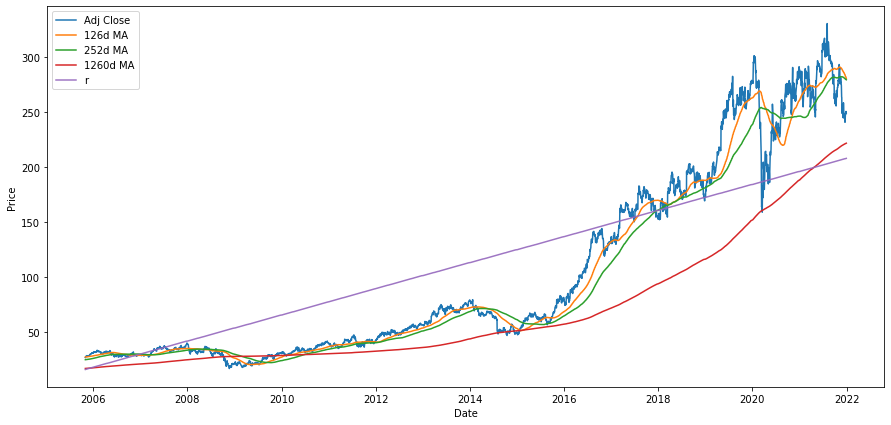

In [24]:
#Plot
plt.figure(figsize=(15,7))
plt.plot(prices['Adj Close'][1260:], label='Adj Close')
plt.plot(prices['mu_126d'][1260:], label='126d MA') #sehr adaptiv
plt.plot(prices['mu_252d'][1260:], label='252d MA')
plt.plot(prices['mu_1260d'][1260:], label='1260d MA') #wenig adaptiv
plt.plot(prices['trend'][1260:], label='r', alpha=0.9) #Regressionsgerade
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#Alternativ 'labels' weglassen
#plt.legend(['Adj Close','mu_126d','mu_252d','mu_1260d','Trendline'])

**Frage 1:** Wir wollen drei verschiedene Handelsstrategien testen. Erläutern Sie jeweils mit einem Satz, welche Annahme hinter den Strategien Mean Reversion, Moving Average Crossover und Buy-and-Hold steckt.

- Mean Reversion: Der Preis eines Assets unterliegt zufälligen Fluktuationen um einen stabilen Basistrend herum, weshalb Werte, die weit vom Trend abweichen, dazu neigen die Richtung zu wechseln und zum Mittelwert zurückzukehren.

- Moving Average Crossover: Ein einfacher Weg ein Momentumsignal zu erhalten, ist die Suche nach einem Moving Average Crossover. Dies bedeutet, dass zwei gleitende Mittelwerte unterschiedlicher Länge berechnet werden und darauf gewettet wird, dass sie sich kreuzen, wobei die Art und Richtung der Kreuzung die Richtung des Momentums angibt.

- Buy-and-Hold: Der Fokus bei dieser Strategie liegt auf dem langfristigen Trend, weshalb der Anleger die Aktie über einen langen Zeitraum behält sowie auf eine gute Performance des Assets in der Zukunft setzt und der langfristige positive Trend kurzfristige negative Schwankungen ausgleichen soll.

**Frage 2:** Erläutern Sie in einem Satz, ob es grundsätzlich Sinn macht die gegenläufigen Strategien Mean Reversion und Moving Average Crossover auf eine Aktie anzuwenden.

Im Ein-Asset Fall setzt man sich dem Marktrisiko aus und ist nicht abgesichert im Gegensatz zu einem Portfolio.

Dies kann bei der MR-Strategie dazu führen, dass man einen langen Aufwärtstrend immer wieder unterbewertet und einen langen Abwärtstrend immer wieder überbewertet.

Bei der MAC-Strategie besteht die Gefahr, dass man in eine Aktie investiert, dessen vergangene Preise keinen signifikanten Einfluss auf seine zukünftigen Preise hat (Stichwort: Autokorrelation). Vor allem ist die Gefahr umso größer, wenn die Intensität des Zufallsrauschens größer ist als die der Trends. Denn Zufallsrauschen von Aktienpreisen beruhen nicht auf Fundementaldaten, die man mithilfe von Kennzahlen identifizieren könnte. Zudem könnte die Gefahr groß sein, in eine Aktie zu investieren, deren Preise sich 'seitwärts' verhalten. Auch hier wäre es nicht möglich von der MAC-Strategie zu profitieren.

# Implementierung Mean Reversion

## Parameter berechnen bzw. festlegen

Als erstes testen wir die Mean Reversion Strategie. Dafür orientieren wir uns am rollierenden 1-Jahres Durchschnitt. Generieren Sie ein Dataframe *MR* aus dem Dataframe *prices* mit den Spalten *Adj Close*, *return*, und *mu_252d*. 

In [43]:
MR = prices[['Adj Close','return','mu_252d']]
MR

#Alternativ
#MR = prices.drop(['mu_126d', 'mu_1260d', 'trend'], axis=1)

,Adj Close,return,mu_252d
Date,,,
2001-01-01,12.005582,NaN,NaN
2001-01-02,11.823679,-0.015267,NaN
2001-01-03,11.569016,-0.021774,NaN
2001-01-04,12.005582,0.037041,NaN
2001-01-05,12.005582,0.000000,NaN
...,...,...,...
2021-12-23,247.294113,0.008972,279.682620
2021-12-27,248.324921,0.004160,279.519659
2021-12-28,250.337433,0.008072,279.374321


Wir wollen uns bei unserer Strategie am z-score orientieren. Generieren Sie die Spalte *std*, die die rollierende 252-Tages Standardabweichung enthält. Generieren Sie aus *mu_252d* und *std* die Spalte *zscores*, die für jeden Tag den z-score enthält.

In [54]:
std = MR['Adj Close'].rolling(window=252, center=False).std()
zscores = (MR['Adj Close']-mu_252d) / std

MR['std'] = std
MR['zscores'] = zscores
MR

C:\Users\Dennis\AppData\Local\Temp/ipykernel_6612/3597101812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MR['std'] = std
C:\Users\Dennis\AppData\Local\Temp/ipykernel_6612/3597101812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MR['zscores'] = zscores


,Adj Close,return,mu_252d,std,zscores
Date,,,,,
2001-01-01,12.005582,NaN,NaN,NaN,NaN
2001-01-02,11.823679,-0.015267,NaN,NaN,NaN
2001-01-03,11.569016,-0.021774,NaN,NaN,NaN
2001-01-04,12.005582,0.037041,NaN,NaN,NaN
2001-01-05,12.005582,0.000000,NaN,NaN,NaN
...,...,...,...,...,...
2021-12-23,247.294113,0.008972,279.682620,18.423548,-1.757995
2021-12-27,248.324921,0.004160,279.519659,18.518706,-1.684499
2021-12-28,250.337433,0.008072,279.374321,18.603586,-1.560822


**Frage 3:** Warum nehmen wir nicht einfach die Trendlinie, um zu sehen, ob der Kurs über oder unter dem langfristigen Trend ist?

Die MeanReversion-Strategie ist auf kurzfristige Zeiträume ausgelegt (short-term-reversal). Eine Trendlinie/ Regressionsgerade würde jedoch nur den globalen Trend abbilden, nicht aber lokale Trends, um welche der Aktienkurs herum schwankt. Durch das rollierende Fenster passt sich der MovingAverage viel schneller an kurzfristige Trends bzw. Schwankungen an und gibt somit kurzfristige Handelssignale.

Weiterhin gibt der z-score an, wie viele Standardabweichungen der aktuelle Kurs vom Mittelwert entfernt ist und nicht nur, ob dieser über oder unter der Trendlinie liegt. Dies ist wiederum bei der Festlegung von Handlungsempfehlungen hilfreich.

## Position festlegen

Unsere Mean Reversion Strategie unterscheidet sich von der Vorlesung darin, dass wir nur eine Aktie kaufen beziehungsweise verkaufen. Unser Portfolio beinhaltet somit entweder eine Aktienposition, keine Aktie oder eine negative Position. 

Wir bauen die Strategie wie folgt auf: 
- Wenn der Aktienkurs mehr als eine Standardabweichung über dem 252-Tages Durchschnitt liegt, dann wollen wir die Aktie verkaufen (short-selling).
- Wenn der Aktienkurs mehr als eine Standardabweichung unter dem 252-Tages Durchschnitt liegt, dann wollen wir die Aktie kaufen.
- Wenn der Aktienkurs und der gleitende Durchschnitt nahe zusammenliegen (zwischen -0.5 und 0.5), dann wollen wir unsere Position aufgeben: Wir kaufen, wenn wir short sind und verkaufen, wenn wir long sind.
- In allen anderen Fällen halten wir unsere Position weiter.
- Wir starten ohne eine Position (d.h. Stance = 0), bis wir ein entsprechendes Kauf- bzw. Verkaufsignal bekommen. 

Folgendes fiktives Beispiel soll die Funktionsweise der Strategie verdeutlichen:

> Der Aktienkurs steigt am 01.10.2022 eine Standardabweichung über den 252-Tages Durchschnitt. Nun gehen wir eine short Position ein. Am 10.10.2022 steigt der z-score auf 1.5. Da wir bereits eine short Position eingegangen sind, bleibt unsere Position (stance) auf -1. Am 15.10.2022 fällt der z-score auf 0.75, da wir die Verkaufsschwelle von 0.5 noch nicht erreicht haben, bleibt die Position weiter auf -1. Diese eine short Position halten wir nun weiter bis zum 20.10.2022, da an diesem Tag der z-score unter 0.5 fällt. Am 20.10.2022 geben wir daher unserer eine short Position wieder auf. Für den Zeitraum 01.10.2022 bis 19.10.2022 soll daher stance -1 sein.

Generieren Sie die Spalte *Stance*, die folgende Werte annehmen kann:
- *Stance* = 1, long Position.
- *Stance* = -1, short Position.
- *Stance* = 0, keine Position.

Tipp: Es bietet sich an die Strategie über eine for-Schleife aufzubauen, die über jeden z-score läuft. Somit kann für jeden z-score mit entsprechenden if/elif/else Bedingungen geprüft werden, ob stance den Wert 1, 0 oder -1 annehmen soll.

In [27]:
# Initialize stance
MR['Stance'] = np.zeros(len(asset))

# Define possible stances
for i in range(len(asset)):
    # Sell short if the z-score is > 1
    if zscores[i] > 1:
        MR['Stance'][i] = -1
    # Buy long if the z-score is < -1
    elif zscores[i] < -1:
        MR['Stance'][i] = 1
    # Clear positions if the z-score between -.5 and .5 
    elif abs(zscores[i]) < 0.5:
        MR['Stance'][i] = 0
    # Do nothing at all, keep position as it was the day before in [i-1]
    else:
        MR['Stance'][i] = MR['Stance'][i-1]
MR
#MR.iloc[295:320,:] #Beispielzeitraum

,Adj Close,return,mu_252d,std,zscores,Stance
Date,,,,,,
2001-01-01,12.005582,NaN,NaN,NaN,NaN,0.0
2001-01-02,11.823679,-0.015267,NaN,NaN,NaN,0.0
2001-01-03,11.569016,-0.021774,NaN,NaN,NaN,0.0
2001-01-04,12.005582,0.037041,NaN,NaN,NaN,0.0
2001-01-05,12.005582,0.000000,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
2021-12-23,247.294113,0.008972,279.682620,18.423548,-1.757995,1.0
2021-12-27,248.324921,0.004160,279.519659,18.518706,-1.684499,1.0
2021-12-28,250.337433,0.008072,279.374321,18.603586,-1.560822,1.0


Generieren Sie nun die Spalten *Strategy* und *Strategy Equity*. *Strategy* sagt uns welche Rendite wir bei Ausführen der Signale *Stance* erhalten. Dabei gehen wir davon aus, dass wir das Signal immer erst einen Tag später ausführen können. *Strategy Equity* gibt uns die kummulierte Veränderung unseres Kapitals an. 

,Adj Close,return,mu_252d,std,zscores,Stance,Strategy,Strategy Equity
Date,,,,,,,,
2001-01-01,12.005582,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2001-01-02,11.823679,-0.015267,NaN,NaN,NaN,0.0,-0.000000,1.000000
2001-01-03,11.569016,-0.021774,NaN,NaN,NaN,0.0,-0.000000,1.000000
2001-01-04,12.005582,0.037041,NaN,NaN,NaN,0.0,0.000000,1.000000
2001-01-05,12.005582,0.000000,NaN,NaN,NaN,0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...
2021-12-23,247.294113,0.008972,279.682620,18.423548,-1.757995,1.0,0.008972,0.532250
2021-12-27,248.324921,0.004160,279.519659,18.518706,-1.684499,1.0,0.004160,0.536410
2021-12-28,250.337433,0.008072,279.374321,18.603586,-1.560822,1.0,0.008072,0.544482


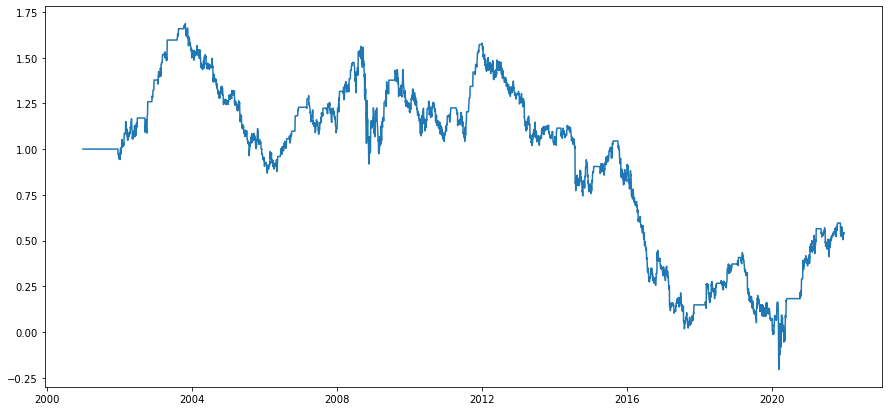

In [28]:
# Create columns containing daily market log returns and strategy daily log returns
strategy = MR['return'] * MR['Stance'].shift(1)
MR['Strategy'] = strategy

# Set strategy starting equity to 1 (i.e. 100%) and generate equity curve
MR['Strategy Equity'] = MR['Strategy'].cumsum() + 1

#Plot
plt.figure(figsize=(15,7));
plt.plot(MR['Strategy Equity']);

MR
#MR.iloc[295:320,:] #Beispielzeitraum

#Alternativ
#strategy = [MR['return'][i] * -MR['Stance'][i-1] for i in range(len(asset))]
#strategy[0:2] = np.zeros(2) #oder strategy[0:2] = np.array([0,0]) oder strategy[0:2] = [0,0]
#MR['Strategy Equity'] = [np.sum(MR['Strategy'][:i]) for i in range(len(asset))]

Berechnen Sie die Anzahl der Tage an denen die Strategie short, long oder keine Position annimmt. Nutzten Sie dafür beispielsweise die Funktion ".value_counts()".

In [29]:
MR['Stance'].value_counts()

-1.0    3205
 0.0    1414
 1.0     746
Name: Stance, dtype: int64

# Implementierung Moving Average Crossover

## Parameter berechnen bzw. festlegen

Für die Moving Average Crossover Strategie betrachten wir den rollierenden 126-Tages und den rollierenden 1260-Tages Durchschnitt. Generieren Sie das Dataframe *MAC* aus dem Dataframe *prices* mit den Spalten *Adj Close*, *return*, *mu_126d* und *mu_1260d* . 

In [30]:
# Generate MAC
MAC = prices[['Adj Close', 'return', 'mu_126d', 'mu_1260d']]
MAC

,Adj Close,return,mu_126d,mu_1260d
Date,,,,
2001-01-01,12.005582,NaN,NaN,NaN
2001-01-02,11.823679,-0.015267,NaN,NaN
2001-01-03,11.569016,-0.021774,NaN,NaN
2001-01-04,12.005582,0.037041,NaN,NaN
2001-01-05,12.005582,0.000000,NaN,NaN
...,...,...,...,...
2021-12-23,247.294113,0.008972,282.164886,221.171114
2021-12-27,248.324921,0.004160,281.686884,221.264687
2021-12-28,250.337433,0.008072,281.206934,221.359499


Sehen Sie sich zuerst nochmal beide Durchschnitte in einer Grafik an und verdeutlichen Sie sich unsere Strategie. Unser Signal beruht also auf dem Unterschied zwischen dem lang- und kurzfristigen Trend. 

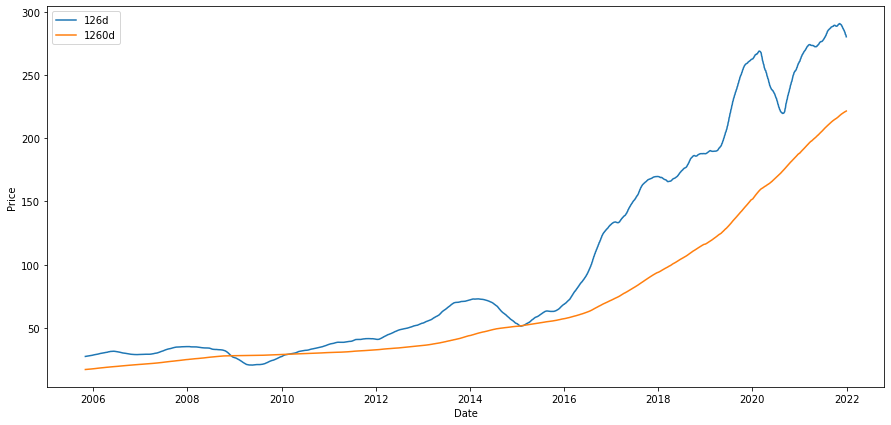

In [31]:
# Plot mu_126d and mu_1260d
plt.figure(figsize=(15,7))
plt.plot(MAC['mu_126d'][1260:]);
plt.plot(MAC['mu_1260d'][1260:]);
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['126d', '1260d']);

Generieren Sie die Spalte *MAC['126-1260']*, die den Unterschied zwischen beiden Trends angibt. 

In [32]:
# Create column with moving average spread differential
MAC['126-1260'] = MAC['mu_126d'] - MAC['mu_1260d']
MAC

C:\Users\Dennis\AppData\Local\Temp/ipykernel_6612/3250662222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MAC['126-1260'] = MAC['mu_126d'] - MAC['mu_1260d']


,Adj Close,return,mu_126d,mu_1260d,126-1260
Date,,,,,
2001-01-01,12.005582,NaN,NaN,NaN,NaN
2001-01-02,11.823679,-0.015267,NaN,NaN,NaN
2001-01-03,11.569016,-0.021774,NaN,NaN,NaN
2001-01-04,12.005582,0.037041,NaN,NaN,NaN
2001-01-05,12.005582,0.000000,NaN,NaN,NaN
...,...,...,...,...,...
2021-12-23,247.294113,0.008972,282.164886,221.171114,60.993772
2021-12-27,248.324921,0.004160,281.686884,221.264687,60.422196
2021-12-28,250.337433,0.008072,281.206934,221.359499,59.847434


## Position festlegen

Wir bauen die Strategie wie folgt auf: 
- Wenn der kurzfristige Trend mindestens 11 EUR über dem langfristigen Trend liegt, dann kaufen wir die Aktie.
- Wenn der kurzfristige Trend mindestens 11 EUR unter dem langfristigen Trend liegt, dann verkaufen wir die Aktie.
- In allen anderen Fällen halten wir keine Position.  

Generieren Sie die Spalte *Stance*, die folgende Werte annehmen kann:
- *Stance* = 1, long Position.
- *Stance* = -1, short Position.
- *Stance* = 0, keine Position.

In [33]:
# Set desired number of points as threshold for spread difference and 
# Create column containing strategy 'Stance'
X = 11
MAC['Stance'] = np.where(MAC['126-1260'] > X, 1, 0)
MAC['Stance'] = np.where(MAC['126-1260'] < -X, -1, MAC['Stance'])
MAC

,Adj Close,return,mu_126d,mu_1260d,126-1260,Stance
Date,,,,,,
2001-01-01,12.005582,NaN,NaN,NaN,NaN,0
2001-01-02,11.823679,-0.015267,NaN,NaN,NaN,0
2001-01-03,11.569016,-0.021774,NaN,NaN,NaN,0
2001-01-04,12.005582,0.037041,NaN,NaN,NaN,0
2001-01-05,12.005582,0.000000,NaN,NaN,NaN,0
...,...,...,...,...,...,...
2021-12-23,247.294113,0.008972,282.164886,221.171114,60.993772,1
2021-12-27,248.324921,0.004160,281.686884,221.264687,60.422196,1
2021-12-28,250.337433,0.008072,281.206934,221.359499,59.847434,1


Generieren Sie außerdem die Spalten *Strategy* und *Strategy Equity*, analog zu 3.2.

In [34]:
# Create columns containing daily market log returns and strategy daily log returns
MAC['Market Returns'] = np.log(MAC['Adj Close'] / MAC['Adj Close'].shift(1))
MAC['Strategy'] = MAC['Market Returns'] * MAC['Stance'].shift(1)

# Set strategy starting equity to 1 (i.e. 100%) and generate equity curve
MAC['Strategy Equity'] = MAC['Strategy'].cumsum() + 1
MAC

,Adj Close,return,mu_126d,mu_1260d,126-1260,Stance,Market Returns,Strategy,Strategy Equity
Date,,,,,,,,,
2001-01-01,12.005582,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2001-01-02,11.823679,-0.015267,NaN,NaN,NaN,0,-0.015267,-0.000000,1.000000
2001-01-03,11.569016,-0.021774,NaN,NaN,NaN,0,-0.021774,-0.000000,1.000000
2001-01-04,12.005582,0.037041,NaN,NaN,NaN,0,0.037041,0.000000,1.000000
2001-01-05,12.005582,0.000000,NaN,NaN,NaN,0,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...
2021-12-23,247.294113,0.008972,282.164886,221.171114,60.993772,1,0.008972,0.008972,2.069601
2021-12-27,248.324921,0.004160,281.686884,221.264687,60.422196,1,0.004160,0.004160,2.073760
2021-12-28,250.337433,0.008072,281.206934,221.359499,59.847434,1,0.008072,0.008072,2.081832


Berechnen Sie die Anzahl der Tage an denen die Strategie short, long oder keine Position annimmt.

In [35]:
MAC['Stance'].value_counts()

0    3075
1    2290
Name: Stance, dtype: int64

# Implementierung Buy-and-Hold Strategy

Zuletzt wollen wir noch eine simple Buy-and-Hold Strategie implementieren. Wir kaufen am ersten Handelstag in 2001 und halten bis zum letzten Handelstag von 2021. Generieren Sie entsprechend das Dataframe *BAH* mit den Spalten *Adj Close*, *return*, *Strategy* und *Strategy Equity*.

In [36]:
# Generate the dataframe BAH from the prices dataframe
BAH = prices[['Adj Close', 'return']]

# Create columns containing daily market log returns and strategy daily log returns
BAH['Strategy'] = np.log(BAH['Adj Close'] / BAH['Adj Close'].shift(1))

# Set strategy starting equity to 1 (i.e. 100%) and generate equity curve
BAH['Strategy Equity'] = BAH['Strategy'].cumsum() + 1
BAH

C:\Users\Dennis\AppData\Local\Temp/ipykernel_6612/1970076769.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BAH['Strategy'] = np.log(BAH['Adj Close'] / BAH['Adj Close'].shift(1))
C:\Users\Dennis\AppData\Local\Temp/ipykernel_6612/1970076769.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BAH['Strategy Equity'] = BAH['Strategy'].cumsum() + 1


,Adj Close,return,Strategy,Strategy Equity
Date,,,,
2001-01-01,12.005582,NaN,NaN,NaN
2001-01-02,11.823679,-0.015267,-0.015267,0.984733
2001-01-03,11.569016,-0.021774,-0.021774,0.962959
2001-01-04,12.005582,0.037041,0.037041,1.000000
2001-01-05,12.005582,0.000000,0.000000,1.000000
...,...,...,...,...
2021-12-23,247.294113,0.008972,0.008972,4.025207
2021-12-27,248.324921,0.004160,0.004160,4.029366
2021-12-28,250.337433,0.008072,0.008072,4.037438


# Vergleich der Strategien

Sehen Sie sich die drei Equity Curves in einer Grafik an.

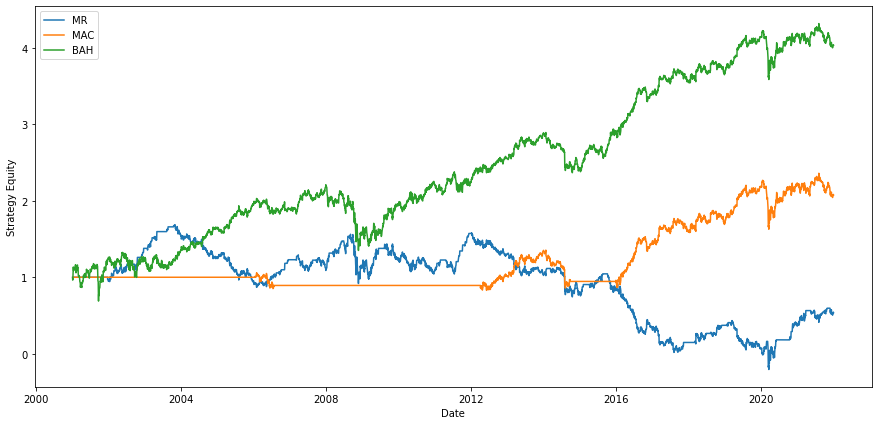

In [37]:
# Equity Curves
plt.figure(figsize=(15,7));
#plt.plot(prices['Adj Close'], label='Market return')
plt.plot(MR['Strategy Equity'], label='MR');
plt.plot(MAC['Strategy Equity'], label='MAC');
plt.plot(BAH['Strategy Equity'], label='BAH');
plt.xlabel('Date');
plt.ylabel('Strategy Equity');
plt.legend();

In [38]:
MR.tail(1)
MAC.tail(1)
BAH.tail(1)
MAC['Stance'][:1313].value_counts()
MAC[:1313].tail()

,Adj Close,return,mu_126d,mu_1260d,126-1260,Stance,Market Returns,Strategy,Strategy Equity
Date,,,,,,,,,
2006-01-05,32.292233,-0.002981,28.695659,17.747567,10.948092,0,-0.002981,-0.0,1.0
2006-01-06,32.247890,-0.001374,28.729734,17.763618,10.966116,0,-0.001374,-0.0,1.0
2006-01-09,31.895088,-0.011001,28.760855,17.779316,10.981539,0,-0.011001,-0.0,1.0
2006-01-10,31.725435,-0.005333,28.790692,17.795068,10.995624,0,-0.005333,-0.0,1.0
2006-01-11,31.704233,-0.000669,28.817162,17.811121,11.006042,1,-0.000669,-0.0,1.0


 **Frage 4:** Wie bewerten Sie die drei Strategien anhand der Equity Curve?

Anhand der Grafik zur Equity Curve ist deutlich zu erkennen, dass die Strategie "Buy and Hold" am besten abschneidet. Der Endwert liegt bei 4,03. Der Wert von "Moving Average Crossover" beträgt 2,07 und der Wert der "Mean Reversion" Strategie liegt bei 0,54.

Bei der **BAH-Strategie** wird die Adidas Aktie erworben und bis zum Ende gehalten, ohne auf die Kursschwankungen aktiv zu reagieren. Diese soll als Benchmark für die beiden anderen Strategien dienen.

Die **MR-Strategie** kann von Anfang der Zeitreihe bis ca. 2012 noch mit der BAH-Strategie mithalten, da die Aktie in diesem Zeitraum keinem langfrisigen Trend folgt und somit immer wieder sinkt und steigt. Bei dem langfristigen Trend von 2012 bis 2021 ist die MR-Strategie offensichtlich nicht zu empfehlen, da sie mit einer Rückkehr zum Mittelwert rechnet (past winner wird zu future looser). Dies wird dadurch bestätigt, dass wir bei der Auswertung unserer Handelssignale über 3200 Short-Selling Signale erhalten haben. Die Wette auf fallende Kurse geht somit nicht besonders gut auf, weshalb wir am Ende lediglich einen Strategy Equity Wert von 0,54 aufweisen. Im Zeitraum der letzten 10 Jahre ist die BAH-Strategie deutlich überlegen. Dies ist nicht verwunderlich, da die MR-Strategie auf kurzfristige Zeiträume ausgelegt ist (short-term-reversal).

Die **MAC-Strategie** schneidet gegenüber der BAH-Strategie von 2001 bis 2012 eher schlecht ab, da hier mit Außnahme von 2006 die Position immer glattgestellt ist und durch die große Fensterlänge die Strategie erst ab 2006 beginnt zu traden. Die Strategie ist ab ca. 2012 profitabel, als ein Momentum einsetzt und die kurzfristige Trendlinie die langfristige Trendlinie von unten kreuzt und mindestens 11 EUR darüber liegt (long-Position). Jedoch ist die Rendite auch in diesem Zeitraum nicht besser als die einfache BAH-Strategie. Die Strategie reagiert jedoch schnell auf den langfrisitgen Trend ab 2012 was auf die große Differenz der beiden Fensterlängen zurückzuführen ist.

**Frage 5:** Unter Berücksichtigung von Transaktionskosten, würde sich Ihre Meinung ändern?

Die Meinung würde sich nicht ändern. Bei Buy and Hold fallen lediglich beim einmaligen Kauf und beim einmaligen Verkauf Transaktionskosten an. Hierbei kann auch außer Acht gelassen werden, in welcher Höhe sich diese befinden, wenn man dies mit den Anzahlen der Trades der beiden anderen Strategien vergleicht. Daher schneidet die BAH-Strategie mit Transaktionskosten noch besser ab im Gegensatz zu MR und MAC.

Denn für unsere MR-Strategie erhielten wir insgesamt:

(-1.0 ==  3205)

 (0.0  ==  1414)

 (1.0   ==  746)

 3951 Handelssignale.

 Diese sind alle mit Transaktionskosten für den Kauf und den Verkauf der Aktien verbunden.

 Bei MAC sieht es ähnlich aus:

 (0.0  ==  3075)

(1.0   == 2290)

Hier erhielten wir 2290 Handelssignale für Longpositionen. Shortpositionen konnten hierfür keine ermittelt werden.